## Importing libraries

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

## Importing dataset

In [256]:
# url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_data = pd.read_csv("IRIS.csv", names=column_names)

In [257]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [258]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


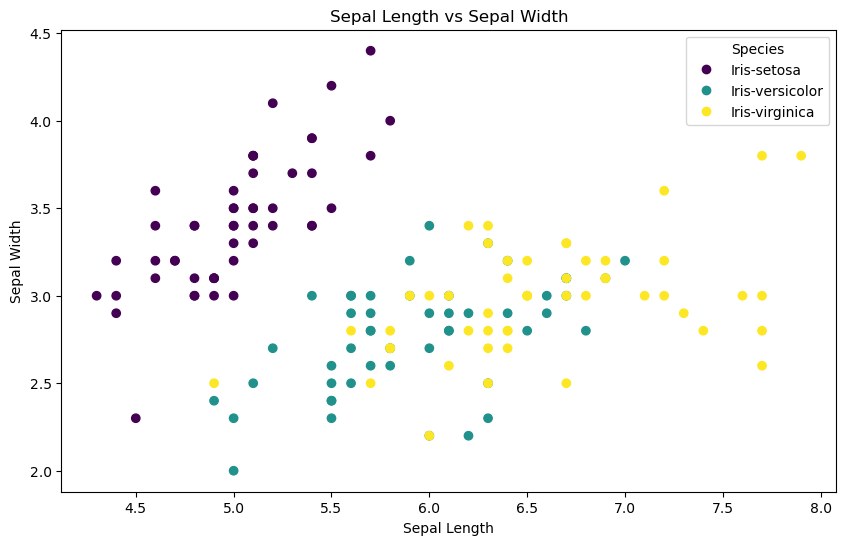

In [259]:
# sns.pairplot(iris_data,hue='species')
# plt.show()



# plt.figure(figsize=(10, 6))
# plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c=iris_data['species'].astype('category').cat.codes, cmap='viridis', label=iris_data['species'])
# plt.xlabel('Sepal Length')
# plt.ylabel('Sepal Width')
# plt.title('Sepal Length vs Sepal Width')
# # plt.legend()
# plt.show()




# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c=iris_data['species'].astype('category').cat.codes, cmap='viridis')
# plt.xlabel('Sepal Length')
# plt.ylabel('Sepal Width')
# plt.title('Sepal Length vs Sepal Width')

# # Generate legend handles and labels
# handles, labels = scatter.legend_elements()

# # Adding legend based on unique species
# plt.legend(handles, iris_data['species'].unique(), title='Species')

# plt.show()


# import matplotlib.pyplot as plt

# Assuming iris_data is your DataFrame containing the Iris dataset

# Remove the first row from the DataFrame
# iris_data_subset = iris_data.iloc[1:]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c=iris_data['species'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

# Generate legend handles and labels
handles, labels = scatter.legend_elements()

# Adding legend based on unique species
plt.legend(handles, iris_data['species'].unique(), title='Species')

plt.show()



# Scatter plot with seaborn (for enhanced visuals)
# sns.pairplot(iris_data, hue='species', height=2.5)
# plt.show()

In [260]:
X = iris_data.drop("species", axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [261]:
y = iris_data["species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [262]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
data = pd.read_csv('IRIS.csv', skiprows=1)

# Extract features (X) and labels (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column is the target variable 'species'

# Convert X to numeric (if necessary, depending on your data)
X = X.apply(pd.to_numeric)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [263]:
knn = KNeighborsClassifier(n_neighbors=3)

# Convert any potential string columns to numeric


# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [264]:
y_pred = knn.predict(X_test)

In [265]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [266]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.93      0.81      0.87        16

       accuracy                           0.91        45
      macro avg       0.90      0.91      0.90        45
   weighted avg       0.92      0.91      0.91        45



### Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positives.

$$ \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}} $$

### Recall (Sensitivity or True Positive Rate)
Recall is the ratio of correctly predicted positive observations to the total actual positives.

$$ \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}} $$

### F1-Score
F1-score is the harmonic mean of precision and recall, providing a balance between the two.

$$ \text{F1-Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$
recision+Recall
2×Precision×Recall
​
t{Recall}} \]
 \text{Recall}}
\]

In [267]:
X_test.head(2)

,4.9,3,1.4,0.2
125,6.1,3.0,4.9,1.8
51,5.5,2.3,4.0,1.3


In [268]:
# 5.1	3.5	1.4	0.2

In [269]:
# new_data = pd.DataFrame({"sepal_length":[6.7],"sepal_width":6.5,"petal_length":3.4,"petal_width":2.9})
new_data=np.array([[3.45, 2.61, 2.72, 1.81]])

In [270]:
prediction = knn.predict(new_data)

c:\Users\Hemant Gupta\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [271]:
prediction[0]

'Iris-versicolor'

In [272]:
iris_data.iloc[100:]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
